<a href="https://colab.research.google.com/github/uzzain/humanitydataanalysis/blob/main/AI%ED%88%B4%EC%9D%B4%ED%9A%8C%ED%99%94%EB%8A%A5%EB%A0%A5%EC%97%90_%EB%AF%B8%EC%B9%98%EB%8A%94%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('language_learning_dataset_complete.csv')

# 데이터 확인
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48913 entries, 0 to 48912
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Time                                          48913 non-null  object 
 1   Age                                           48913 non-null  int64  
 2   Gender                                        48913 non-null  object 
 3   Native Language                               48913 non-null  object 
 4   Country of Residence                          48913 non-null  object 
 5   Language Proficiency Level (Initial)          48913 non-null  object 
 6   Type of Activity                              48913 non-null  object 
 7   Lesson Content Type                           48913 non-null  object 
 8   Number of Lessons Completed                   48913 non-null  int64  
 9   Time Spent on Learning (Hours)                48913 non-null 

In [3]:
# 결측치 처리: 결측치가 있는 행 제거
df_cleaned = df[['Use of AI Tools', 'Speaking Fluency Scores']].dropna()

# 범주형 데이터 인코딩
df_cleaned['Use of AI Tools'] = df_cleaned['Use of AI Tools'].apply(lambda x: 1 if x == 'Yes' else 0)

# 데이터 확인
print(df_cleaned.info())
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 38940 entries, 0 to 48912
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Use of AI Tools          38940 non-null  int64  
 1   Speaking Fluency Scores  38940 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 912.7 KB
None
   Use of AI Tools  Speaking Fluency Scores
0                0                58.509473
1                0                69.879090
3                0                36.286628
4                0                54.925089
5                0                80.355542


In [4]:
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 설정
X = df_cleaned[['Use of AI Tools']]
y = df_cleaned['Speaking Fluency Scores']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error: 386.1951150666547
R-squared: -0.00021727105684399284
Model Coefficients: [0.]
Model Intercept: 59.91342691583577


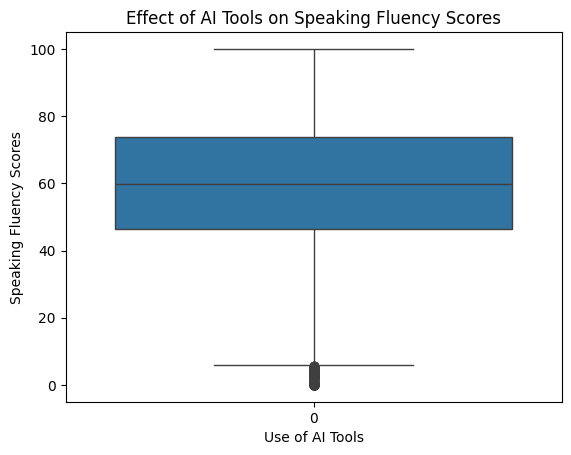

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 시각화
sns.boxplot(x='Use of AI Tools', y='Speaking Fluency Scores', data=df_cleaned)
plt.title("Effect of AI Tools on Speaking Fluency Scores")
plt.show()

In [7]:
correlation = df_cleaned.corr()
print(correlation)

                         Use of AI Tools  Speaking Fluency Scores
Use of AI Tools                      NaN                      NaN
Speaking Fluency Scores              NaN                      1.0


In [8]:
# 다중 회귀 분석에 사용할 변수 선택
features = ['Use of AI Tools', 'Participation in Interactive Exercises', 'Learning Consistency (Days Per Week Studied)']
df_multi = df[['Speaking Fluency Scores'] + features].dropna()

# 독립 변수와 종속 변수 분리
X_multi = pd.get_dummies(df_multi[features], drop_first=True)  # 범주형 데이터 인코딩
y_multi = df_multi['Speaking Fluency Scores']

# 데이터 분할 및 회귀 분석 동일하게 수행
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# 모델 학습 및 평가
model.fit(X_train, y_train)
y_pred_multi = model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Multi-feature Mean Squared Error:", mse_multi)
print("Multi-feature R-squared:", r2_multi)

Multi-feature Mean Squared Error: 386.2898254855098
Multi-feature R-squared: -0.0004625641560889182


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Mean Squared Error:", mse_dt)
print("Decision Tree R-squared:", r2_dt)

Decision Tree Mean Squared Error: 387.2756086526605
Decision Tree R-squared: -0.0030156708910897834


In [11]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 387.2315696684311
Random Forest R-squared: -0.0029016131236363485


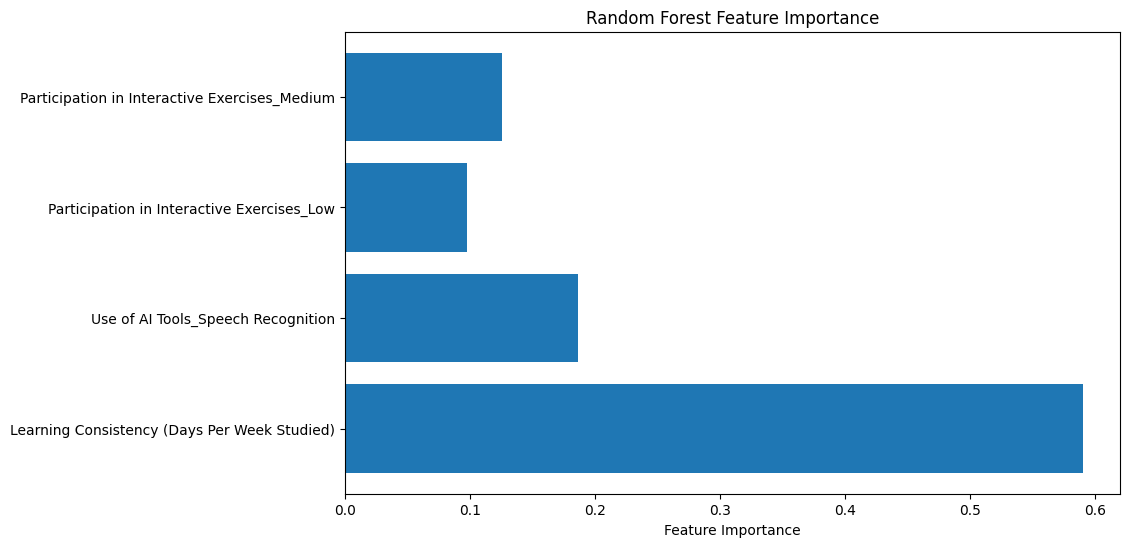

In [12]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = rf_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()